In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

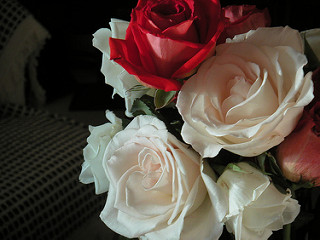

In [8]:
PIL.Image.open(str(roses[1]))

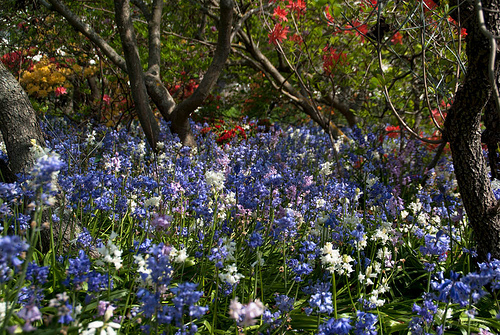

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [10]:
flowers_images_dict = {
  'roses': list(data_dir.glob('roses/*')),
  'daisy': list(data_dir.glob('daisy/*')),
  'dandelion': list(data_dir.glob('dandelion/*')),
  'sunflowers': list(data_dir.glob('sunflowers/*')),
  'tulips': list(data_dir.glob('tulips/*'))
}
     

In [11]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['roses'][0]


WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [14]:
img = cv2.imread(flowers_images_dict['roses'][0])
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [25]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
       for image in images:
           img = cv2.imread(image)
           resized_img = cv2.resize(img,(180, 180))  
           x.append(resized_img)
           y.append(flowers_labels_dict[flower_name])
           #resizing images bc machine learning models expect all input samples to be the same size

In [28]:
x=np.array(x)
y=np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [32]:
len(x_train)

2752

In [34]:
len(x_test)

918

In [38]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [52]:
model = Sequential([
      layers.Conv2D(16, 3, padding='same', activation='relu'),  #16 filters of size 3x3
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'), #32 filters of size 3x3
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'), #64 filters of size 3x3
      layers.MaxPooling2D(),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.3511 - loss: 1.5116
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 337ms/step - accuracy: 0.5978 - loss: 1.0178
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 342ms/step - accuracy: 0.6654 - loss: 0.8298
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 347ms/step - accuracy: 0.7640 - loss: 0.6185
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 340ms/step - accuracy: 0.8489 - loss: 0.4461
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 340ms/step - accuracy: 0.9042 - loss: 0.2824
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 343ms/step - accuracy: 0.9556 - loss: 0.1474
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - accuracy: 0.9796 - loss: 0.0957
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 343ms/step - accuracy: 0.9737 - loss: 0.0999
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 340ms/step - accuracy: 0.9835 - loss: 0.0563
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.9929 - loss: 0.0386
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29

In [54]:
model.evaluate(x_test_scaled, y_test)  #case of overfitting bc accuracy is comiong out to be 65% here

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6319 - loss: 2.8087


[2.7857789993286133, 0.6503267884254456]

In [56]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


array([[  0.17448694,  19.680939  ,  -3.5110326 , -21.27802   ,
        -15.207301  ],
       [  8.176568  ,  -0.7224872 , -13.081676  ,  -1.102602  ,
          5.3341804 ],
       [ -1.5704134 ,   2.054644  ,  21.187819  , -14.791616  ,
        -12.119527  ],
       ...,
       [ -0.4642895 ,  -4.4195867 , -11.404615  ,   8.54315   ,
          9.4209385 ],
       [ -3.5566213 ,   1.7888564 ,   5.994132  ,  -0.7397914 ,
          0.98448896],
       [  2.449053  , -13.100095  ,   1.1566805 ,   8.751134  ,
          5.993159  ]], dtype=float32)

In [58]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.3764109e-09, 1.0000000e+00, 8.4694481e-11, 1.6283550e-18,
       7.0506567e-16], dtype=float32)>

In [60]:
np.argmax(score)

1

In [64]:
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.3),  #zooming the image. You can contrast, roate and do whatever you want
])

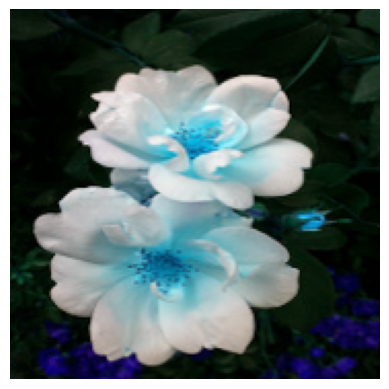

In [66]:
plt.axis('off')
plt.imshow(x[0])

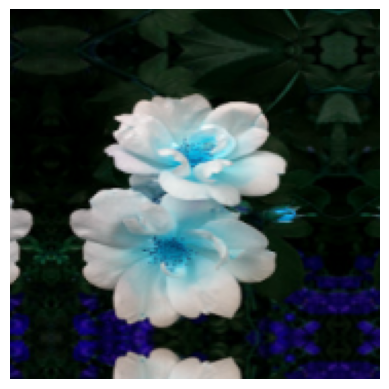

In [68]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [75]:
#Improve Test Accuracy Using Data Augmentation

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", 
                                  input_shape=(180,    
                                  180,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 56s 559ms/step - accuracy: 0.3302 - loss: 1.6634
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 458ms/step - accuracy: 0.5468 - loss: 1.1021
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 458ms/step - accuracy: 0.6064 - loss: 0.9692
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 470ms/step - accuracy: 0.6639 - loss: 0.8880
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 476ms/step - accuracy: 0.6678 - loss: 0.8679
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 478ms/step - accuracy: 0.6971 - loss: 0.7975
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 476ms/step - accuracy: 0.7266 - loss: 0.7320
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 480ms/step - accuracy: 0.7407 - loss: 0.6854
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 483ms/step - accuracy: 0.7323 - loss: 0.6992
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 471ms/step - accuracy: 0.7551 - loss: 0.6512
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 376ms/step - accuracy: 0.7639 - loss: 0.6169
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32